<a href="https://colab.research.google.com/github/tomonari-masada/course2021-nlp/blob/main/05_PyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch入門（１）
参考資料: 
* PyTorch公式のチュートリアル https://pytorch.org/tutorials/index.html

注意:
* ランタイムのタイプをGPUにしておいてください。
  * 上のメニュー「ランタイム」→「ランタイムのタイプを変更」で「GPU」を選択 


## 1. テンソル

In [ ]:
import numpy as np
import torch

### テンソルの作り方

In [ ]:
# 1で埋められたテンソルを作る
x = torch.ones(2, 5)
print(x)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
# 要素のデータ型を確認する
print(x.dtype)

torch.float32


In [ ]:
# 0で埋められたテンソルを作る
x = torch.zeros(4, 4)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [ ]:
# 特定の値で埋められたテンソルを作る
x = torch.full((2, 3), 3.141592)
print(x)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])


In [ ]:
# 不定な値を要素とするテンソルを作る
x = torch.empty(5, 3) 
print(x)

tensor([[-6.6738e+06,  3.0956e-41,  3.3631e-44],
        [ 0.0000e+00,         nan,  0.0000e+00],
        [ 1.1578e+27,  1.1362e+30,  7.1547e+22],
        [ 4.5828e+30,  1.2121e+04,  7.1846e+22],
        [ 9.2198e-39,  7.0374e+22,  1.8515e+28]])


In [ ]:
# [0,1)の一様乱数を要素とするテンソルを作る
x = torch.rand(5, 3)
print(x)

tensor([[0.8415, 0.5839, 0.1145],
        [0.9596, 0.3560, 0.4337],
        [0.6644, 0.5246, 0.7349],
        [0.3655, 0.6408, 0.5650],
        [0.7820, 0.0212, 0.2225]])


In [ ]:
# Pythonのリストからテンソルを作る
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [ ]:
# NumPyのndarrayからテンソルを作る
a = np.array([1, 2, 3])
print(a)
t = torch.from_numpy(a)
print(t)

a[0] = -1
print(t)
t[1] = -2
print(a)

[1 2 3]
tensor([1, 2, 3])
tensor([-1,  2,  3])
[-1 -2  3]


In [ ]:
# cloneメソッドを使ってテンソルの複製を作る
a = np.array([1, 2, 3])
print(a)
t = torch.from_numpy(a)
print(t)
s = t.clone()
print(s)

s[0] = -1
print(a)
print(s)

a[1] = -2
print(a)
print(s)

[1 2 3]
tensor([1, 2, 3])
tensor([1, 2, 3])
[1 2 3]
tensor([-1,  2,  3])
[ 1 -2  3]
tensor([-1,  2,  3])


In [ ]:
# テンソルからndarrayを作る
x = torch.ones(3,4)
print(x)
y = x.numpy()
print(y)
print()

x[0,0] = -1
print(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
tensor([[-1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])
[[-1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]



* 参考: NumPyのnumpy.copyはshallow copy
 * https://numpy.org/doc/stable/reference/generated/numpy.copy.html


In [ ]:
from copy import deepcopy

x = torch.ones(3,4)
print(x)
y = deepcopy(x.numpy())
x[0,0] = -1
print(x)
print(y)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[-1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]])
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### テンソルの形状を得る

In [ ]:
x = torch.zeros(5, 3) 
print(x)

print(x.size())
print(x.shape)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([5, 3])
torch.Size([5, 3])


### 既存のテンソルから新たにテンソルを作る

In [ ]:
# 既存のテンソルから形状を引き継いで新たにテンソルを作る
# 要素のデータ型は変更できる
x2 = torch.randn_like(x, dtype=torch.float)
print(x2)

tensor([[-0.1899, -0.2854,  0.2315],
        [ 0.3351, -0.0832, -0.2939],
        [-1.8034,  0.9114,  1.0022],
        [ 1.3136, -0.8853,  1.1224],
        [ 0.8120, -0.5010, -0.3269]])


### テンソルの要素のデータ型いろいろ

In [ ]:
a = torch.tensor(1)
print(a, a.dtype)

tensor(1) torch.int64


In [ ]:
x = torch.tensor(2.0)
print(x, x.dtype)
y = torch.tensor(2.0, dtype=torch.float64)
print(y, y.dtype)
z = torch.tensor(2.0, dtype=torch.float16)
print(z, z.dtype)
print()

print(x + y + z)

tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64
tensor(2., dtype=torch.float16) torch.float16

tensor(6., dtype=torch.float64)


In [ ]:
b = torch.tensor(True)
print(b, b.dtype)

tensor(True) torch.bool


### 特定の型のテンソルとして初期化(1)

In [ ]:
a = torch.tensor(1, dtype=torch.int32)
print(a, a.dtype)
x = torch.tensor(2.0, dtype=torch.float)
print(x, x.dtype)
z = torch.tensor(2.0, dtype=torch.double)
print(z, z.dtype)

tensor(1, dtype=torch.int32) torch.int32
tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64


### 特定の型のテンソルとして初期化(2)

In [ ]:
a = torch.IntTensor([1, 2, 3])
print(a, a.dtype)
x = torch.FloatTensor(np.array([2.0, -4.0]))
print(x, x.dtype)
y = torch.DoubleTensor([2.0, -4.0])
print(y, y.dtype)
b = torch.BoolTensor([1, 0, 2, 0])
print(b, b.dtype)

tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([ 2., -4.]) torch.float32
tensor([ 2., -4.], dtype=torch.float64) torch.float64
tensor([ True, False,  True, False]) torch.bool


### 要素の型の変更

In [ ]:
a = torch.tensor([1, 10])
print(a, a.dtype)
x = a.float()
print(x, x.dtype)
y = a.type(torch.float64)
print(y, y.dtype)
z = a.type_as(x)
print(z, z.dtype)

tensor([ 1, 10]) torch.int64
tensor([ 1., 10.]) torch.float32
tensor([ 1., 10.], dtype=torch.float64) torch.float64
tensor([ 1., 10.]) torch.float32


### スカラーとベクトル

In [ ]:
s = torch.tensor(1.0)
print(s)
print(s.dim())
print(s.shape)
v = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(v)
print(v.dim())
print(v.shape)
v = torch.tensor([4.0])
print(v)
print(v.dim())
print(v.shape)

tensor(1.)
0
torch.Size([])
tensor([1., 2., 3., 4.])
1
torch.Size([4])
tensor([4.])
1
torch.Size([1])


In [ ]:
# 要素がひとつのテンソルから、その要素を単なる数値として取り出す
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.2094])
-1.2094446420669556


### 行列

In [ ]:
m = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
print(m)
print(m.dim())
print(m.shape)
print(m[1, 1])

tensor([[1., 2.],
        [3., 4.]])
2
torch.Size([2, 2])
tensor(4.)


### テンソル

In [ ]:
t = torch.tensor([[[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])
print(t)
print(t.dim())
print(t.shape)
print(t[1, 1, 1])

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3
torch.Size([2, 2, 2])
tensor(8.)


In [ ]:
t = torch.tensor([[[[1.0, 1.0], [2.0, 2.0]], [[3.0, 3.0], [4.0, 4.0]]],
                        [[[5.0, 5.0], [6.0, 6.0]], [[7.0, 7.0], [8.0, 8.0]]]])
print(t)
print(t.dim())
print(t.shape)
print(t[1, 1, 1, 1])

tensor([[[[1., 1.],
          [2., 2.]],

         [[3., 3.],
          [4., 4.]]],


        [[[5., 5.],
          [6., 6.]],

         [[7., 7.],
          [8., 8.]]]])
4
torch.Size([2, 2, 2, 2])
tensor(8.)


## 2. テンソルのビュー 

### view()メソッド
* viewとreshapeについては、下記リンク先を参照。
 * https://pytorch.org/docs/stable/tensor_view.html

In [ ]:
v = torch.arange(0, 12)
print(v)
print(v.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])


In [ ]:
m34 = v.view(3, 4)
print(m34)
print(m34.shape)

m43 = v.view(4, -1)
print(m43)
print(m43.shape)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


### reshape()メソッド

In [ ]:
v = torch.arange(0, 12)
print(v)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [ ]:
m26 = v.view(2, 6)
print(m26)
print(m26.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
torch.Size([2, 6])


### contiguousなテンソルとそうでないテンソルの違い
* 「contiguousである」とは、テンソルとしての要素の配置の順番が、メモリ上での要素の配置の順番と一致していることを言う。
* 例えばtメソッドは、見かけ上で転置するだけなので、その結果得られるテンソルでの要素の配置の順番は、メモリ上の要素の配置の順番と一致しなくなる。
* contiguous()メソッドを呼ぶことで、強制的にメモリ上の要素の配置の順番を、テンソルでのそれに一致させることができる。

In [ ]:
print(m26.is_contiguous())

m62 = m26.t()
print(m62)
print(m62.is_contiguous())

m62_new = m62.contiguous()
print(m62_new)
print(m62_new.is_contiguous())

True
tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
False
tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
True


In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
m34 = m26.view(3, 4)
print(m34)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
m62 = m26.t()
m34 = m62.view(3, 4) # これはエラーになる

RuntimeError: ignored

In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
m62 = m26.t()
m34 = m62.reshape(3, 4) # reshapeではエラーにならない
print(m62)
print(m34)

tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


In [ ]:
v = torch.arange(0, 12)
m26 = v.view(2, 6)
m62 = m26.t()
m62_new = m62.contiguous() # contiguousにしてからだと・・・
m34 = m62_new.view(3, 4) # エラーにならない
print(m62)
print(m34)

tensor([[ 0,  6],
        [ 1,  7],
        [ 2,  8],
        [ 3,  9],
        [ 4, 10],
        [ 5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


### テンソルとその要素のメモリ上での配置
* 下のリンク先が詳しい。
 * https://livebook.manning.com/book/deep-learning-with-pytorch/chapter-3/v-12/198

In [ ]:
m = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
print(m)
print(m.storage())

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]


In [ ]:
m = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]])
m = m.t()
print(m)
print(m.storage())

tensor([[4., 5., 2.],
        [1., 3., 1.]])
 4.0
 1.0
 5.0
 3.0
 2.0
 1.0
[torch.FloatStorage of size 6]


## 3. テンソルの操作

### 演算

In [ ]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x)
print(y)
print(x + y)

tensor([[4.1936e-01, 9.8843e-01, 9.8131e-01],
        [2.5286e-01, 3.4098e-01, 8.9567e-01],
        [7.6979e-01, 1.2013e-01, 9.8493e-01],
        [2.7389e-01, 6.7922e-01, 6.9708e-04],
        [7.0776e-02, 1.5792e-01, 6.2412e-01]])
tensor([[0.7726, 0.9800, 0.7196],
        [0.8080, 0.8283, 0.0552],
        [0.6343, 0.1871, 0.2728],
        [0.7161, 0.2366, 0.2699],
        [0.6480, 0.4551, 0.8095]])
tensor([[1.1920, 1.9684, 1.7009],
        [1.0609, 1.1693, 0.9508],
        [1.4041, 0.3072, 1.2578],
        [0.9899, 0.9158, 0.2706],
        [0.7187, 0.6130, 1.4336]])


In [ ]:
print(torch.add(x, y))

tensor([[1.1920, 1.9684, 1.7009],
        [1.0609, 1.1693, 0.9508],
        [1.4041, 0.3072, 1.2578],
        [0.9899, 0.9158, 0.2706],
        [0.7187, 0.6130, 1.4336]])


In [ ]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[1.1920, 1.9684, 1.7009],
        [1.0609, 1.1693, 0.9508],
        [1.4041, 0.3072, 1.2578],
        [0.9899, 0.9158, 0.2706],
        [0.7187, 0.6130, 1.4336]])


### NumPyのndarrayからfrom_numpy()でPyTorchのテンソルを作る

In [ ]:
a = np.zeros(3)
t = torch.from_numpy(a)
print(a)
print(t)

# 元のndarrayを変更するとテンソルも変更されることに注意！
np.add(a, 1, out=a)
print(a)
print(t)

[0. 0. 0.]
tensor([0., 0., 0.], dtype=torch.float64)
[1. 1. 1.]
tensor([1., 1., 1.], dtype=torch.float64)


In [ ]:
t = torch.zeros(3)
a = t.numpy()
print(t)
print(a)

t.add_(1)
print(t)
print(a)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[1. 1. 1.]


### clone()によるテンソルの複製

In [ ]:
t = torch.zeros(3)

a = t.clone().numpy()
print(t)
print(a)

t.add_(1) # aは変わらない
print(t)
print(a)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[0. 0. 0.]


### インデクシング
* NumPyと同じ。

In [ ]:
x = torch.rand(5, 3)
print(x)
print(x[:,1])

tensor([[0.6249, 0.7944, 0.0689],
        [0.5029, 0.5317, 0.0614],
        [0.6121, 0.9074, 0.1199],
        [0.1561, 0.2504, 0.4157],
        [0.2593, 0.5288, 0.7553]])
tensor([0.7944, 0.5317, 0.9074, 0.2504, 0.5288])


### item()とtolist()によるPythonの組み込み型への変換

In [ ]:
t = torch.tensor([1.0])
print(t)
print(type(t))
s = t.item()
print(s)
print(type(s))

tensor(1.)
<class 'torch.Tensor'>
1.0
<class 'float'>


In [ ]:
t = torch.rand(2,2)
print(t)
print(type(t))
l = t.tolist()
print(l)
print(type(l))

tensor([[0.6103, 0.6843],
        [0.6399, 0.1557]])
<class 'torch.Tensor'>
[[0.6102650165557861, 0.6842734217643738], [0.639850378036499, 0.15566885471343994]]
<class 'list'>


### GPUへテンソルを持っていく
* ランタイムのタイプをGPUへ変更してから下のセルを実行する。

In [ ]:
import torch

# GPUが使える環境かどうかの確認
torch.cuda.is_available()

True

In [ ]:
# GPUの取得
device = torch.device("cuda")
print(device)

cuda


In [ ]:
x = torch.rand(5, 3)

y = torch.ones_like(x, device=device) # 直接GPU上にテンソルを作る
x = x.to(device)                      # CPU上で作ってからGPUへ持っていく
z = x + y
print(z)
w = z.cpu()
print(w)
print(w.dtype)
w = w.numpy()
print(w)
print(w.dtype) # float32になることに注意

tensor([[1.4658, 1.0610, 1.9082],
        [1.6088, 1.9841, 1.9015],
        [1.2983, 1.8106, 1.4835],
        [1.2062, 1.3491, 1.2142],
        [1.5023, 1.1410, 1.4514]], device='cuda:0')
tensor([[1.4658, 1.0610, 1.9082],
        [1.6088, 1.9841, 1.9015],
        [1.2983, 1.8106, 1.4835],
        [1.2062, 1.3491, 1.2142],
        [1.5023, 1.1410, 1.4514]])
torch.float32
[[1.4657847 1.0610323 1.9082218]
 [1.6087737 1.9840844 1.9014901]
 [1.2982651 1.8106154 1.483527 ]
 [1.2062154 1.3491174 1.2142324]
 [1.502337  1.1409731 1.4514111]]
float32


## 4. 自動微分

### それに関して微分をする変数を作る
* requires_gradをTrueにする

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.requires_grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


* テンソルを作った後でrequires_gradをTrueにすることもできる。

In [ ]:
a = torch.randn(2, 2)
print(a)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)

tensor([[-1.5126,  0.6357],
        [ 2.2184,  1.1074]])
False
True


In [ ]:
a = torch.randn(2, 2)
print(a)
print(a.requires_grad)
a.requires_grad = True
print(a.requires_grad)

tensor([[ 1.4793, -0.0027],
        [-0.9856,  0.9407]])
False
True


### 計算グラフ
* 微分できる変数を含む計算を行うと、計算グラフが作られる。

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
y = x + 2
print(y)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [ ]:
x = torch.ones(2, 2, device=device, requires_grad=True)
print(x)
y = x * x * 4
out = y.mean()
print(out)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0', requires_grad=True)
tensor(4., device='cuda:0', grad_fn=<MeanBackward0>)


### Backpropagationの実行

In [ ]:
x = torch.ones(2, 2, device=device, requires_grad=True)
print(x)
y = x * x * 4
print(y)
out = y.mean()
print(out)
out.backward()
print(x.grad) # 微分係数を表示

tensor([[1., 1.],
        [1., 1.]], device='cuda:0', requires_grad=True)
tensor([[4., 4.],
        [4., 4.]], device='cuda:0', grad_fn=<MulBackward0>)
tensor(4., device='cuda:0', grad_fn=<MeanBackward0>)
tensor([[2., 2.],
        [2., 2.]], device='cuda:0')


* 注意：一度 backward() を実行すると、計算グラフは破棄される。
 * 続けて backward() を実行することはできない。

### 計算グラフを作らせない

In [ ]:
x = torch.tensor(3.0, requires_grad=True)
y = x ** 2
print(y.requires_grad)
y.backward()
print(x.grad)
print()

True
tensor(6.)



In [ ]:
x = torch.tensor(3.0, requires_grad=True)
with torch.no_grad():
  y = x ** 2
print(y.requires_grad)
# もしこの行で y.backward() を実行したらエラーが出る

False


In [ ]:
x = torch.tensor(3.0, requires_grad=True)
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


In [ ]:
# f(x) = a*x**2 + b*x + cの、x=2におけるxに関する微分係数を求める

x = torch.tensor(2.0, device=device, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)

y = a * x ** 2 + b * x + c

y.backward()
print(x.grad)

tensor(2., device='cuda:0')


### 計算グラフの可視化

In [ ]:
!pip install torchviz

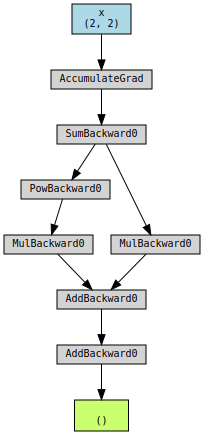

In [ ]:
from torchviz import make_dot

x = torch.ones(2, 2, device=device, requires_grad=True)
x_sum = x.sum()
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)

y = a * x_sum ** 2 + b * x_sum + c
make_dot(y, params={'x':x})

### autograd()を使った高階微分
* 第一引数は微分される関数
* 第二引数はそれに関して微分する変数
* create_graphをTrueにすると計算グラフが作られるので、高階微分を計算できるようになる。

例1. $y = ax^3 + bx^2 + cx + d$を、$x$について微分

In [ ]:
x = torch.tensor(0.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)
d = torch.tensor(5.0)
y = a * x ** 3 + b * x ** 2 + c * x + d

In [ ]:
dy_dx = torch.autograd.grad(y, x) #単に微分するだけ
print(dy_dx) # 要素が一つだけのtupleになっている
print(dy_dx[0])

(tensor(1.),)
tensor(1.)


例2. $y=x_1 x_2$を、$x_1$と$x_2$それぞれについて偏微分

In [ ]:
x1 = torch.tensor(0.0, requires_grad=True)
x2 = torch.tensor(0.0, requires_grad=True)
y = x1 * x2

In [ ]:
dy_dx = torch.autograd.grad(y, (x1, x2)) # 単に微分するだけ
print(dy_dx)

(tensor(0.), tensor(0.))


例3. $y = ax^3 + bx^2 + cx + d$を、$x$について微分し、さらにそれを$x$で微分する

In [ ]:
x = torch.tensor(0.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)
d = torch.tensor(5.0)
y = a * x ** 3 + b * x ** 2 + c * x + d

In [ ]:
# backpropagationの計算の計算グラフを作らせる
dy_dx = torch.autograd.grad(y, x, create_graph=True) 
print(dy_dx)
print(dy_dx[0])

# その計算グラフが表す関数をxで微分
d２y_dx2 = torch.autograd.grad(dy_dx, x)
print(d2y_dx2)
print(d2y_dx2[0])

(tensor(1., grad_fn=<AddBackward0>),)
tensor(1., grad_fn=<AddBackward0>)
(tensor(-4.),)
tensor(-4.)


### 多変数関数の偏微分とヘシアン

例. $y=(x_1+3x_2)^2$のヘシアンを求める

In [ ]:
def func(x1, x2):
  return (x1 + 3 * x2) ** 2

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y = func(x1, x2)

In [ ]:
dy_dx1, dy_dx2 = torch.autograd.grad(y, [x1, x2], create_graph=True)
print(dy_dx1.data, dy_dx2.data)
d2y_dx1dx1, d2y_dx1dx2 = torch.autograd.grad(dy_dx1, [x1, x2], retain_graph=True)
print(d2y_dx1dx1.data, d2y_dx1dx2.data)
d2y_dx2dx1, d2y_dx2dx2 = torch.autograd.grad(dy_dx2, [x1, x2])
print(d2y_dx2dx1.data, d2y_dx2dx2.data)

tensor(14.) tensor(42.)
tensor(2.) tensor(6.)
tensor(6.) tensor(18.)


In [ ]:
# 答え合わせ
print(torch.autograd.functional.hessian(func, inputs=(x1, x2)))

((tensor(2.), tensor(6.)), (tensor(6.), tensor(18.)))


## 5. 自動微分を使った制約なし最適化

例. $f(x)=x^2-2x+1$を最小にする$x$を求める

In [ ]:
# 関数の定義
def f(x, a=1.0, b=-2.0, c=1.0):
  return a * x ** 2 + b * x + c

In [ ]:
# テンソルの準備
x = torch.tensor(10.0, requires_grad=True)

# 最適化手法のインスタンスを作る
#   param: どの変数で微分するか
#   lr: 学習率
optimizer = torch.optim.SGD(params=[x], lr=0.1)

In [ ]:
for i in range(1, 101):
  optimizer.zero_grad()
  y = f(x)
  y.backward()
  optimizer.step()
  if i % 5 == 0:
    print(f'iter {i} : f(x) = {y.data:.6f}, x = {x.data:.6f}')

iter 5 : f(x) = 13.589545, x = 3.949120
iter 10 : f(x) = 1.459167, x = 1.966368
iter 15 : f(x) = 0.156677, x = 1.316659
iter 20 : f(x) = 0.016823, x = 1.103763
iter 25 : f(x) = 0.001806, x = 1.034001
iter 30 : f(x) = 0.000194, x = 1.011142
iter 35 : f(x) = 0.000021, x = 1.003651
iter 40 : f(x) = 0.000002, x = 1.001196
iter 45 : f(x) = 0.000000, x = 1.000392
iter 50 : f(x) = 0.000000, x = 1.000128
iter 55 : f(x) = 0.000000, x = 1.000042
iter 60 : f(x) = 0.000000, x = 1.000014
iter 65 : f(x) = 0.000000, x = 1.000005
iter 70 : f(x) = 0.000000, x = 1.000001
iter 75 : f(x) = 0.000000, x = 1.000000
iter 80 : f(x) = 0.000000, x = 1.000000
iter 85 : f(x) = 0.000000, x = 1.000000
iter 90 : f(x) = 0.000000, x = 1.000000
iter 95 : f(x) = 0.000000, x = 1.000000
iter 100 : f(x) = 0.000000, x = 1.000000


# 課題4
* 関数$f(x_1,x_2)=x_1^2+x_2^2$の最小値と、$f(x_1,x_2)$がその最小値をとるときの$x_1$と$x_2$の値を、PyTorchの自動微分を使って求めよう。